<h2>FIN5615 Project #3
    <p class="text-primary">Random Walk Simulaton (Part II)</p>
</h2>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    In this project we will try to address some of the shortcomings of modeling stock price as a simple random walk. We will compare the simulated option prices from our random walk model against that of the Black-Scholes options pricing formula.
    </div>
</div>
<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Include all code used to produce your results, and support your answers with textual explanations if neccessary. You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5615_Project_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    Recall the random walk simulation we built to model Ford's stock price from the previous project:
    <br><br>
    $$X_{t+1} = \left\{
        \begin{array}{ll}
            X_t \times u = X_te^{\sigma\sqrt{h}} & \quad p = \frac{e^{rh} - d}{u - d} \\
            X_t \times d = X_te^{-\sigma\sqrt{h}} & \quad 1 - p
        \end{array}
    \right.$$ 
    <br><br>Where we assumed that the annual volatility of F's returns is 10% and a risk-free rate of 1%, and simulated the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.
    <br><br>Rerun that simulation using the code below:
    <br><code>
random.seed(5615)

starting_value = 5.
sigma = .1
risk_free = .01

steps = 250
trials = 1000

u = np.exp(sigma \* np.sqrt(1. / steps))
d = 1. / u
p = (np.exp(risk_free / steps) - d) / (u - d)

sims = []
for trial in range(trials):
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < p:
            price_change = u
        else:
            price_change = d

        random_path.append(random_path[-1] \* price_change)
    sims.append(random_path)
</code>
    <br><br>The simulation is stored in the variable <code>sims</code>. Check that <code>sims</code> is a list of length 1000 (i.e. 1000 trials), with each element being a list of length 251 (i.e. price at time 0 plus 250 future time steps).
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [2]:
random.seed(5615)

In [3]:
starting_value = 5.
sigma = .1
risk_free = .01

steps = 250
trials = 1000

u = np.exp(sigma * np.sqrt(1. / steps))
d = 1. / u
p = (np.exp(risk_free / steps) - d) / (u - d)

sims = []
for trial in range(trials):
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < p:
            price_change = u
        else:
            price_change = d
        random_path.append(random_path[-1] * price_change)
    sims.append(random_path)
len(sims)


1000

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    The model we have now is the <b>Cox-Ross-Rubinstein Binomial Tree</b>, and is a much better approximation of stock price movements compared to a simple random walk. We can even price options contracts using this model.
    <br><br>Continue to assume that F is worth \$5 today, with an annual volatility of 10%, and risk-free rate at 1%. 
    <ul>
        <li>Using the simulation results from the previous task, for each of the 1000 trials, calculate the terminal payoff of a call option with strike of \$5.50 that expires 1 year from today. Your result should be a list of 1000 payoffs (one for each trial of the simulation).</li>
        <li>Calculate the simulated average payoff of this call option. It should be approximately \$0.05.</li>
        <li>What is the present value of the simulated average payoff of this call option? This is the Binomial Tree's simulated option price.</li>
        <li>Compare this value against the price under the Black-Scholes options pricing formula (you do not have to do this in python). How close are the two prices?</li>
    </ul>
    <br>Recall the payoff of a call option is $max(S_T - K, 0)$.
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [4]:
random.seed(5615)

In [5]:
random.seed(5615)

starting_value = 5.
sigma = .1
risk_free = .01
k = 5.5
t = 1

steps = 250
trials = 1000


u = np.exp(sigma * np.sqrt(1. / steps))
d = 1. / u
p = (np.exp(risk_free / steps) - d) / (u - d)
c_payoff = []

sims = []
for trial in range(trials):
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < p:
            price_change = u
        else:
            price_change = d


        random_path.append(random_path[-1] * price_change)
    sims.append(random_path)
    c_payoff.append(max(random_path[-1] - k, 0))
average = np.mean(c_payoff)
average
    

0.050584429128212864

In [6]:
PV = average*np.exp(-risk_free * t)
PV

0.050081105648683726


The value of the black-schoels and this value are almost identical, with the black schoels being marginally higher



<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    We can further improve our simulated option price to match the Black-Scholes options price, by (1) using more steps in our binomial tree, i.e. smaller step sizes, and (2) increasing the number of trials.
    <br><br>Reprice the call option on F using 1000 steps and 5000 trials (this will take more computation time). How does the simulated price compare to the Black-Scholes options price? (It should be close.)
    <br><br>Set the random seed to 5615 at the beginning of your code.
    <br><br>Make sure you've changed the values for <code>steps</code> and <code>trials</code>, then rerun the simulation from Task 1. Your simulation should now be a list of lists of lengths 1000 by 5001.
    <p style="text-align:right;">[30pts]</p>
    </div>
</div>

In [7]:
random.seed(5615)

In [8]:
random.seed(5615)
starting_value = 5.
sigma = .1
risk_free = .01
k = 5.5
t = 1

steps = 1000
trials = 5000


u = np.exp(sigma * np.sqrt(1. / steps))
d = 1. / u
p = (np.exp(risk_free / steps) - d) / (u - d)
c_payoff = []

sims = []
for trial in range(trials):
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < p:
            price_change = u
        else:
            price_change = d


        random_path.append(random_path[-1] * price_change)
    sims.append(random_path)
    c_payoff.append(max(random_path[-1] - k, 0))

In [9]:
Average = np.mean(c_payoff)
Average

0.059152444165736916

In [10]:
pv = Average*np.exp(-risk_free * t)
pv

0.058563867512144784

In [11]:
###similar to the last problem, the black scohoels and this problem are nearly identical in value. This time around the black schoels model is sligtly smaller

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Tesla (TSLA) stock price is currently \$1400, with an annual volatility of 70%. Assume a risk-free rate of 1%. Assume a 6-month put option with a strike of \$1200.
    <ul>
        <li>Calculate the price of this put option by simulating a CRR binomial tree with 5000 trials and using 1000 steps. Compare the simulated option price against the Black-Scholes options price which has a theoretical value of \$163.23 (it should be close).</li>
        <li>Plot the average simulated TSLA stock price over the 5000 trials. How does TSLA's simulated average path compare against F?</li>
        <li>If simulations from the CRR Binomial Tree can give option prices similar to the Black-Scholes model, then why do we still use the latter? Under what situations might we prefer simulations over the Black-Scholes model?</li>
    </ul>
    <br>Recall the payoff of a put option is $max(K - S_T, 0)$.
    <br><br>Set the random seed to 5615 at the beginning of your code.
    <p style="text-align:right;">[30pts]</p>
    </div>
</div>

In [12]:
random.seed(5615)

In [13]:
starting_value = 1400.
sigma = .7
risk_free = .01
k = 1200
t = .5

steps = 1000
trials = 5000


u = np.exp(sigma * np.sqrt(.5 / steps))
d = 1. / u
p = (np.exp(risk_free / steps) - d) / (u - d)
p_payoff = []

sims = []
for trial in range(trials):
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < p:
            price_change = u
        else:
            price_change = d


        random_path.append(random_path[-1] * price_change)
    sims.append(random_path)
    p_payoff.append(max(k - random_path[-1], 0))

In [14]:
AVerage = np.mean(p_payoff)
AVerage

165.73579251423828

In [15]:
PV = AVerage*np.exp(-risk_free * t)
PV

164.90918180055624

Tesla's simulated average is far more volatile than F, meaning that F's average is more linear than tesla due to it being a less volitile option. 




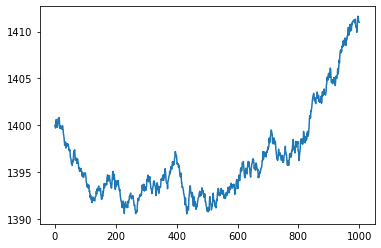

In [16]:
averageP = np.mean(sims, axis = 0)
plt.plot(averageP)
plt.show()

We would use the black-shoels model due to the fact that it is unrivaled in its ability to quickly process and provide accurate data on a bunch of options simueltanously.  However, we would prefer simulations over the black-shoels method when working with exotic options


